In [370]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_excel("bechdel.xlsx")


In [371]:
ap = dados.loc[dados['bi0ry']=='PASS']
rp = dados.loc[dados['bi0ry']=='FAIL']
 
ag_ap = ap.groupby('year')['imdb'].count()
ag_rp = rp.groupby('year')['imdb'].count()
ag_total = dados.groupby('year')['imdb'].count()

qtd_ap_ano = ag_ap.to_frame().reset_index().set_index('year')
qtd_ap_ano = qtd_ap_ano.rename(columns={'imdb' : 'qtd_aprovado'})
qtd_rp_ano = ag_rp.to_frame().reset_index().set_index('year')
qtd_rp_ano = qtd_rp_ano.rename(columns={'imdb' : 'qtd_reprovado'})
qtd_total_ano = ag_total.to_frame().reset_index().set_index('year')
qtd_total_ano = qtd_total_ano.rename(columns={'imdb' : 'qtd_total'})

lista = qtd_total_ano.join(qtd_ap_ano)
lista = lista.join(qtd_rp_ano)

percent_ap_ano = ((lista['qtd_aprovado'].values / lista['qtd_total'])*100).fillna(0).rename('Filmes Aprovados').reset_index()
percent_rp_ano = ((lista['qtd_reprovado'].values / lista['qtd_total'])*100).fillna(0).rename('Filmes Reprovados').reset_index()
percent_ap_rp = percent_ap_ano.set_index('year').join(percent_rp_ano.set_index('year')) 

qtd_ap_rp = lista.drop(columns=['qtd_total']).fillna(0).reset_index()


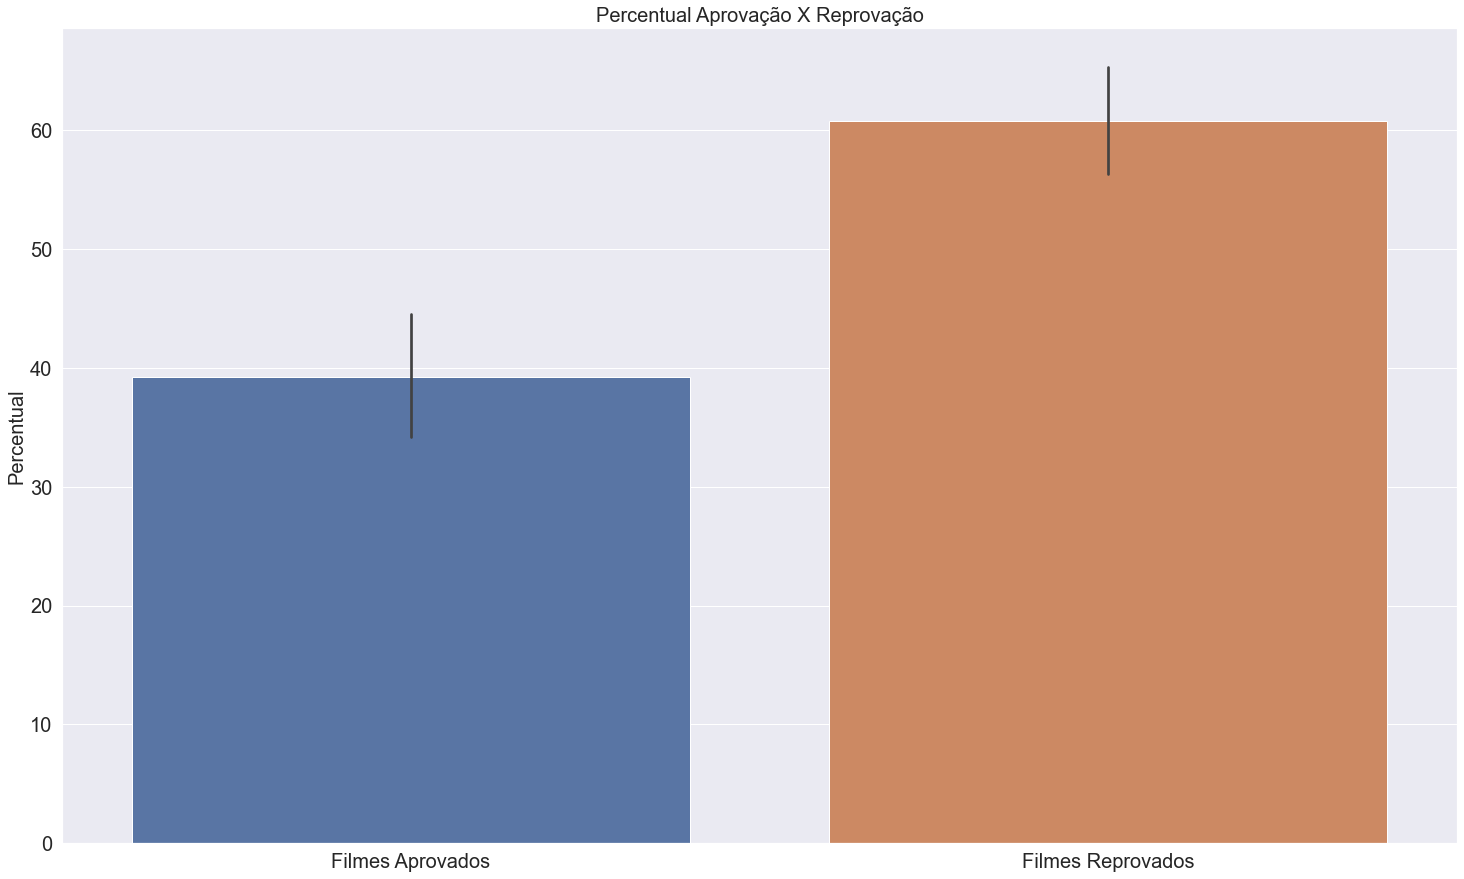

In [372]:
plt.figure( figsize=(25, 15))
plt.ylabel('Percentual', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Percentual Aprovação X Reprovação", fontsize=20)

sns.barplot(data=percent_ap_rp)

plt.show()


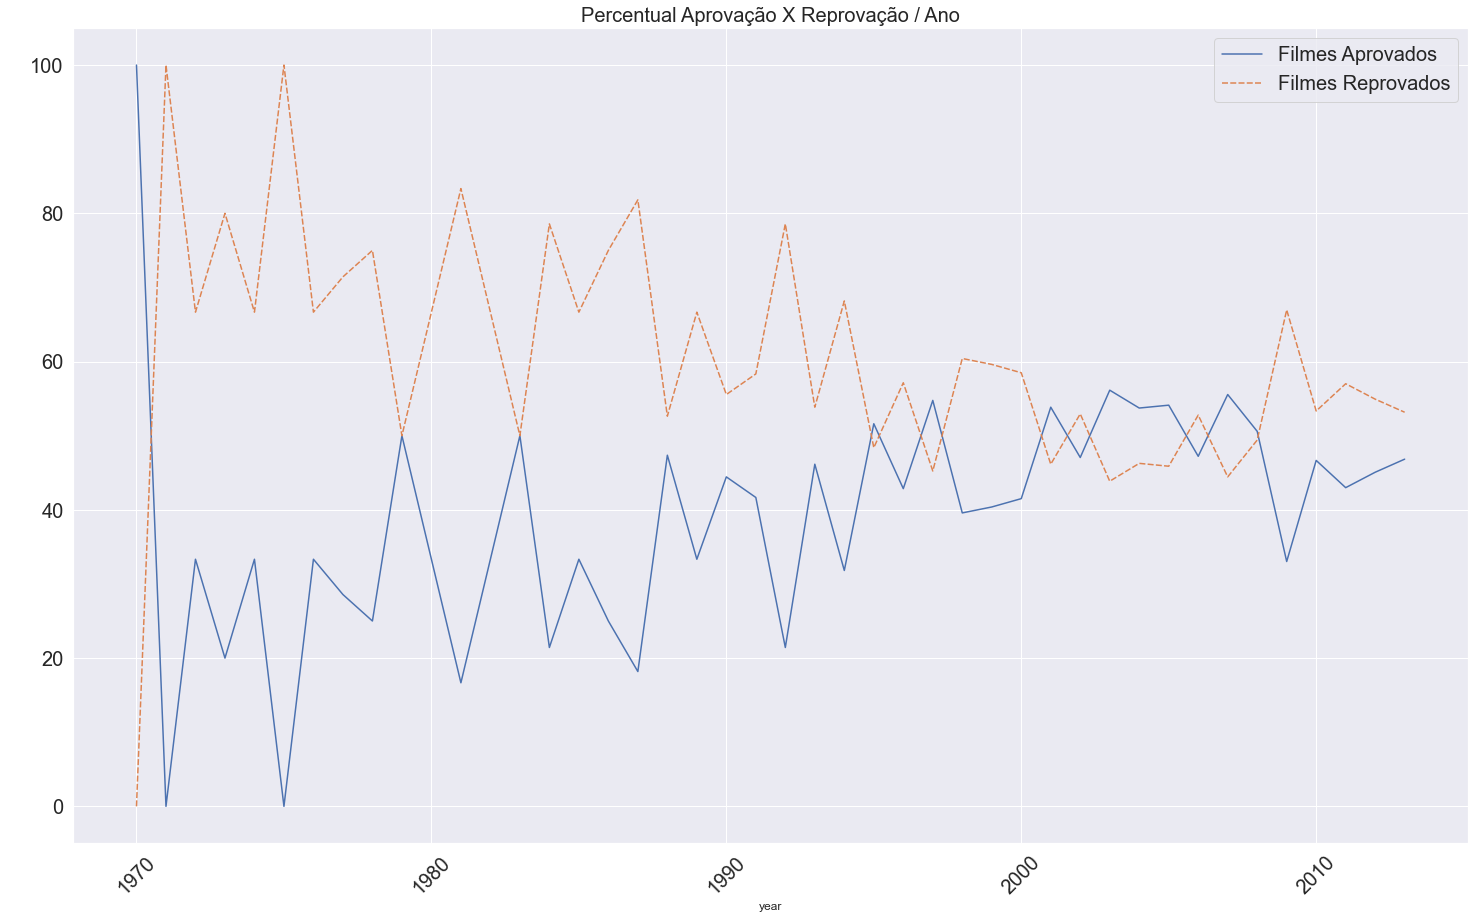

In [373]:
plt.figure( figsize=(25, 15))
plt.ylabel('Percentual', fontsize=20)
plt.ylabel(' ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Percentual Aprovação X Reprovação / Ano", fontsize=20)

sns.lineplot(data=percent_ap_rp)
plt.legend(fontsize=20)
plt.xticks(fontsize=20, rotation=45)

plt.show()

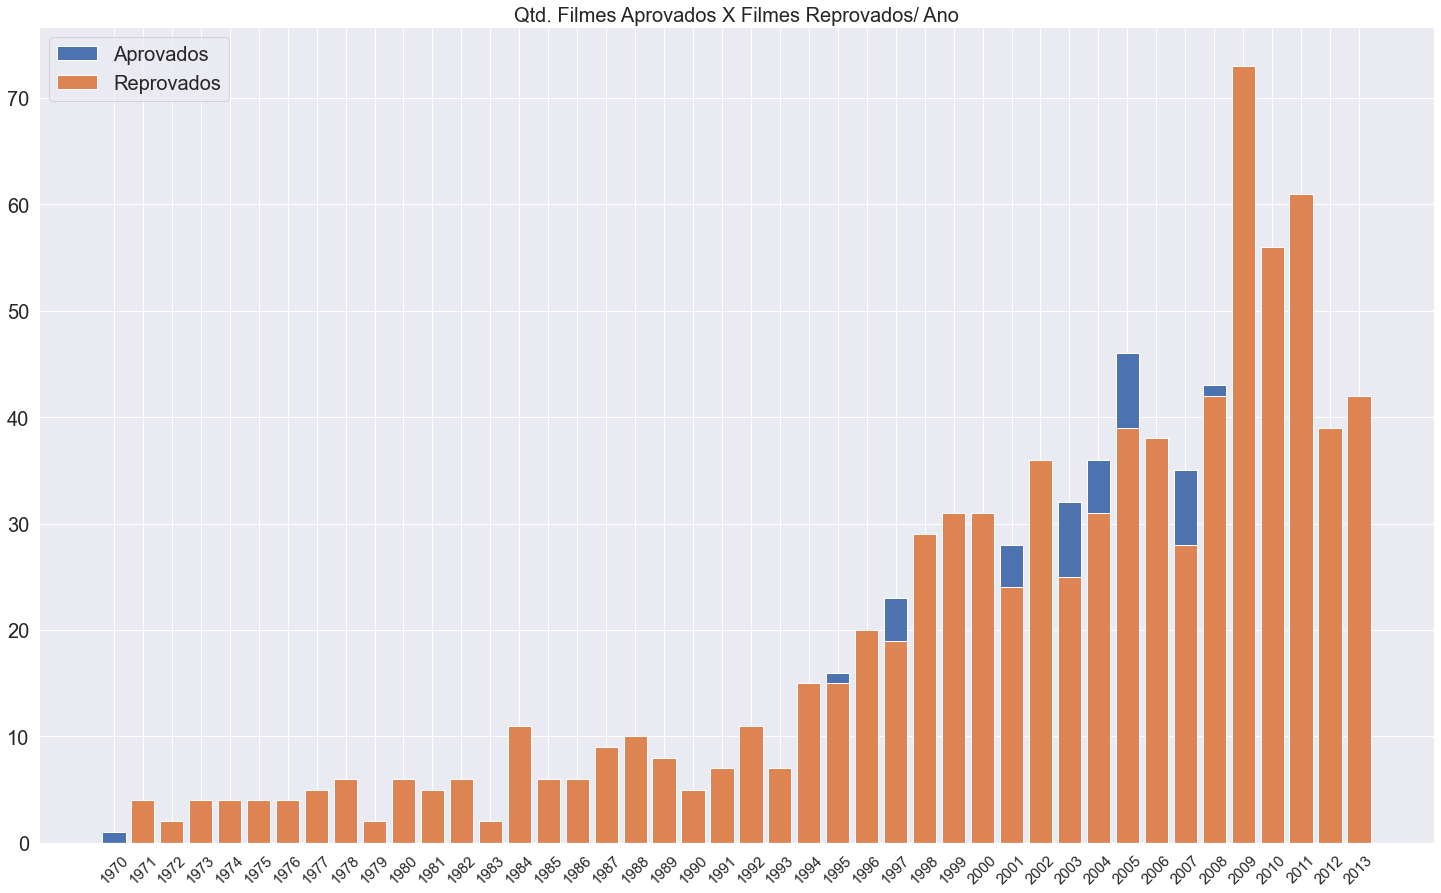

In [375]:
plt.figure( figsize=(25, 15))
plt.title("Qtd. Filmes Aprovados X Filmes Reprovados/ Ano", fontsize=20)

plt.bar(qtd_ap_rp['year'], qtd_ap_rp['qtd_aprovado'], label="Aprovados")
plt.bar(qtd_ap_rp['year'], qtd_ap_rp['qtd_reprovado'], label="Reprovados")
plt.xticks(qtd_ap_rp['year'], fontsize=15, rotation = 45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)


plt.show()
